<a href="https://colab.research.google.com/github/durgadevicd/Retail_Sales_Forecast/blob/main/Sales_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

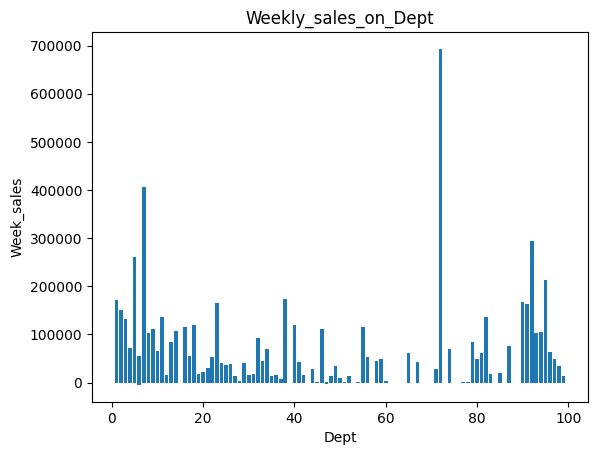

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor

# #dataset:
store = pd.read_csv("/content/stores_data_set.csv")
feature = pd.read_csv("/content/Features_data_set.csv")
sales = pd.read_csv("/content/sales_data_set.csv")

enc= OrdinalEncoder()

#concat
df=pd.merge(sales,feature,how='left',on=['Store','Date','IsHoliday'])
df=pd.merge(df,store,how='left',on=['Store'])
df.fillna(0)
#df['IsReturn']=((df['Weekly_Sales']<0))
df['IsHoliday']=enc.fit_transform(df[['IsHoliday']])
df["Type"]=enc.fit_transform(df[["Type"]])
df = df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1)
df[["day","month","year"]] =df["Date"].str.split("/",expand =True)
#to change df info as int,datetime:
df["day"]=df["day"].astype(str).astype(int)
df["month"]=df["month"].astype(str).astype(int)
df["year"]=df["year"].astype(str).astype(int)
#plot:
x = df['Dept']
y = df['Weekly_Sales']
plt.bar(x,y)
plt.xlabel('Dept')
plt.ylabel('Week_sales')
plt.title('Weekly_sales_on_Dept')
plt.show()

In [ ]:
store = pd.read_csv("/content/stores_data_set.csv")
feature = pd.read_csv("/content/Features_data_set.csv")
sales = pd.read_csv("/content/sales_data_set.csv")

In [ ]:
store

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [ ]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [ ]:
feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
#concat
df=pd.merge(sales,feature,how='left',on=['Store','Date','IsHoliday'])
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,05/10/2012,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,12/10/2012,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,19/10/2012,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [5]:
df=pd.merge(df,store,how='left',on=['Store'])
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type_x,Size_x,day,month,year,Type_y,Size_y
0,1,1,05/02/2010,24924.50,0.0,42.31,2.572,211.096358,8.106,0.0,151315,5,2,2010,A,151315
1,1,1,12/02/2010,46039.49,1.0,38.51,2.548,211.242170,8.106,0.0,151315,12,2,2010,A,151315
2,1,1,19/02/2010,41595.55,0.0,39.93,2.514,211.289143,8.106,0.0,151315,19,2,2010,A,151315
3,1,1,26/02/2010,19403.54,0.0,46.63,2.561,211.319643,8.106,0.0,151315,26,2,2010,A,151315
4,1,1,05/03/2010,21827.90,0.0,46.50,2.625,211.350143,8.106,0.0,151315,5,3,2010,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,0.0,64.88,3.997,192.013558,8.684,1.0,118221,28,9,2012,B,118221
421566,45,98,05/10/2012,628.10,0.0,64.89,3.985,192.170412,8.667,1.0,118221,5,10,2012,B,118221
421567,45,98,12/10/2012,1061.02,0.0,54.47,4.000,192.327265,8.667,1.0,118221,12,10,2012,B,118221
421568,45,98,19/10/2012,760.01,0.0,56.47,3.969,192.330854,8.667,1.0,118221,19,10,2012,B,118221


In [6]:
df.fillna(0)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type_x,Size_x,day,month,year,Type_y,Size_y
0,1,1,05/02/2010,24924.50,0.0,42.31,2.572,211.096358,8.106,0.0,151315,5,2,2010,A,151315
1,1,1,12/02/2010,46039.49,1.0,38.51,2.548,211.242170,8.106,0.0,151315,12,2,2010,A,151315
2,1,1,19/02/2010,41595.55,0.0,39.93,2.514,211.289143,8.106,0.0,151315,19,2,2010,A,151315
3,1,1,26/02/2010,19403.54,0.0,46.63,2.561,211.319643,8.106,0.0,151315,26,2,2010,A,151315
4,1,1,05/03/2010,21827.90,0.0,46.50,2.625,211.350143,8.106,0.0,151315,5,3,2010,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,0.0,64.88,3.997,192.013558,8.684,1.0,118221,28,9,2012,B,118221
421566,45,98,05/10/2012,628.10,0.0,64.89,3.985,192.170412,8.667,1.0,118221,5,10,2012,B,118221
421567,45,98,12/10/2012,1061.02,0.0,54.47,4.000,192.327265,8.667,1.0,118221,12,10,2012,B,118221
421568,45,98,19/10/2012,760.01,0.0,56.47,3.969,192.330854,8.667,1.0,118221,19,10,2012,B,118221


In [7]:
df.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type_x,Size_x,day,month,year,Size_y
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,0.070358,60.090059,3.361027,171.201947,7.960289,0.589912,136727.915739,15.673131,6.449510,2010.968591,136727.915739
std,12.785297,30.492054,22711.183519,0.255750,18.447931,0.458515,39.159276,1.863296,0.666337,60980.583328,8.753549,3.243217,0.796876,60980.583328
min,1.000000,1.000000,-4988.940000,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,34875.000000,1.000000,1.000000,2010.000000,34875.000000
25%,11.000000,18.000000,2079.650000,0.000000,46.680000,2.933000,132.022667,6.891000,0.000000,93638.000000,8.000000,4.000000,2010.000000,93638.000000
50%,22.000000,37.000000,7612.030000,0.000000,62.090000,3.452000,182.318780,7.866000,0.000000,140167.000000,16.000000,6.000000,2011.000000,140167.000000
75%,33.000000,74.000000,20205.852500,0.000000,74.280000,3.738000,212.416993,8.572000,1.000000,202505.000000,23.000000,9.000000,2012.000000,202505.000000
max,45.000000,99.000000,693099.360000,1.000000,100.140000,4.468000,227.232807,14.313000,2.000000,219622.000000,31.000000,12.000000,2012.000000,219622.000000


In [ ]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,IsReturn,day,month,year
0,1,1,05/02/2010,24924.50,0.0,42.31,2.572,211.096358,8.106,0.0,151315,False,05,02,2010
1,1,1,12/02/2010,46039.49,1.0,38.51,2.548,211.242170,8.106,0.0,151315,False,12,02,2010
2,1,1,19/02/2010,41595.55,0.0,39.93,2.514,211.289143,8.106,0.0,151315,False,19,02,2010
3,1,1,26/02/2010,19403.54,0.0,46.63,2.561,211.319643,8.106,0.0,151315,False,26,02,2010
4,1,1,05/03/2010,21827.90,0.0,46.50,2.625,211.350143,8.106,0.0,151315,False,05,03,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,0.0,64.88,3.997,192.013558,8.684,1.0,118221,False,28,09,2012
421566,45,98,05/10/2012,628.10,0.0,64.89,3.985,192.170412,8.667,1.0,118221,False,05,10,2012
421567,45,98,12/10/2012,1061.02,0.0,54.47,4.000,192.327265,8.667,1.0,118221,False,12,10,2012
421568,45,98,19/10/2012,760.01,0.0,56.47,3.969,192.330854,8.667,1.0,118221,False,19,10,2012


In [8]:
df['IsHoliday']=enc.fit_transform(df[['IsHoliday']])

In [ ]:
df

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,24924.50,False,42.31,2.572,211.096358,8.106
1,1,1,46039.49,True,38.51,2.548,211.242170,8.106
2,1,1,41595.55,False,39.93,2.514,211.289143,8.106
3,1,1,19403.54,False,46.63,2.561,211.319643,8.106
4,1,1,21827.90,False,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,64.88,3.997,192.013558,8.684
421566,45,98,628.10,False,64.89,3.985,192.170412,8.667
421567,45,98,1061.02,False,54.47,4.000,192.327265,8.667
421568,45,98,760.01,False,56.47,3.969,192.330854,8.667


In [ ]:
df[["day","month","year"]] =df["Date"].str.split("/",expand =True)
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,IsReturn,day,month,year
0,1,1,05/02/2010,24924.50,0.0,42.31,2.572,211.096358,8.106,A,151315,False,05,02,2010
1,1,1,12/02/2010,46039.49,1.0,38.51,2.548,211.242170,8.106,A,151315,False,12,02,2010
2,1,1,19/02/2010,41595.55,0.0,39.93,2.514,211.289143,8.106,A,151315,False,19,02,2010
3,1,1,26/02/2010,19403.54,0.0,46.63,2.561,211.319643,8.106,A,151315,False,26,02,2010
4,1,1,05/03/2010,21827.90,0.0,46.50,2.625,211.350143,8.106,A,151315,False,05,03,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,0.0,64.88,3.997,192.013558,8.684,B,118221,False,28,09,2012
421566,45,98,05/10/2012,628.10,0.0,64.89,3.985,192.170412,8.667,B,118221,False,05,10,2012
421567,45,98,12/10/2012,1061.02,0.0,54.47,4.000,192.327265,8.667,B,118221,False,12,10,2012
421568,45,98,19/10/2012,760.01,0.0,56.47,3.969,192.330854,8.667,B,118221,False,19,10,2012


In [ ]:
df["Type"] = enc.fit_transform(df[["Type"]])
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,day,month,year
0,1,1,2010-05-02,24924.50,0.0,42.31,2.572,211.096358,8.106,0.0,151315,5,2,2010
1,1,1,2010-12-02,46039.49,1.0,38.51,2.548,211.242170,8.106,0.0,151315,12,2,2010
2,1,1,2010-02-19,41595.55,0.0,39.93,2.514,211.289143,8.106,0.0,151315,19,2,2010
3,1,1,2010-02-26,19403.54,0.0,46.63,2.561,211.319643,8.106,0.0,151315,26,2,2010
4,1,1,2010-05-03,21827.90,0.0,46.50,2.625,211.350143,8.106,0.0,151315,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0.0,64.88,3.997,192.013558,8.684,1.0,118221,28,9,2012
421566,45,98,2012-05-10,628.10,0.0,64.89,3.985,192.170412,8.667,1.0,118221,5,10,2012
421567,45,98,2012-12-10,1061.02,0.0,54.47,4.000,192.327265,8.667,1.0,118221,12,10,2012
421568,45,98,2012-10-19,760.01,0.0,56.47,3.969,192.330854,8.667,1.0,118221,19,10,2012


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  float64       
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   CPI           421570 non-null  float64       
 8   Unemployment  421570 non-null  float64       
 9   Type          421570 non-null  float64       
 10  Size          421570 non-null  int64         
 11  IsReturn      421570 non-null  bool          
 12  day           421570 non-null  int64         
 13  month         421570 non-null  int64         
 14  year          421570 non-null  int64         
dtypes: bool(1), datet

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.drop(columns=df.columns[2],axis=1,inplace=True)
df["day"] = df["day"].astype(str).astype(int)
df["month"]=df["month"].astype(str).astype(int)
df["year"]=df["year"].astype(str).astype(int)

In [ ]:
df

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,24924.50,False,42.31,2.572,211.096358,8.106
1,1,1,46039.49,True,38.51,2.548,211.242170,8.106
2,1,1,41595.55,False,39.93,2.514,211.289143,8.106
3,1,1,19403.54,False,46.63,2.561,211.319643,8.106
4,1,1,21827.90,False,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,64.88,3.997,192.013558,8.684
421566,45,98,628.10,False,64.89,3.985,192.170412,8.667
421567,45,98,1061.02,False,54.47,4.000,192.327265,8.667
421568,45,98,760.01,False,56.47,3.969,192.330854,8.667


<ipython-input-84-50b905d51f37>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment','Type','Size','Dept']].corr()


<Axes: >

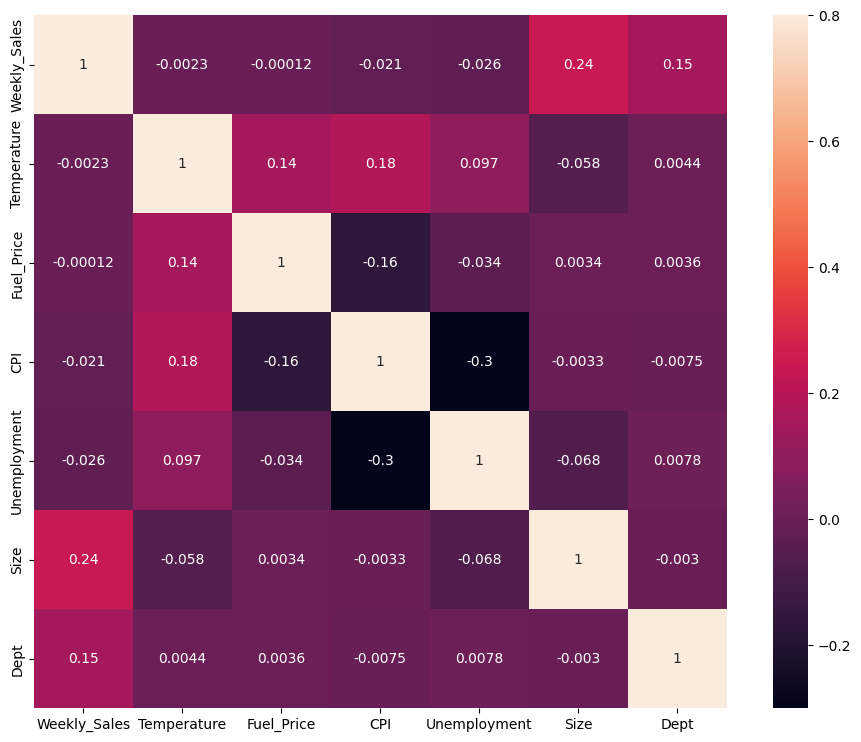

In [ ]:
corrmat=df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment','Type','Size','Dept']].corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True,annot=True)

In [ ]:
df.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,day,month,year
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,0.070358,60.090059,3.361027,171.201947,7.960289,0.589912,136727.915739,15.673131,6.449510,2010.968591
std,12.785297,30.492054,22711.183519,0.255750,18.447931,0.458515,39.159276,1.863296,0.666337,60980.583328,8.753549,3.243217,0.796876
min,1.000000,1.000000,-4988.940000,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,34875.000000,1.000000,1.000000,2010.000000
25%,11.000000,18.000000,2079.650000,0.000000,46.680000,2.933000,132.022667,6.891000,0.000000,93638.000000,8.000000,4.000000,2010.000000
50%,22.000000,37.000000,7612.030000,0.000000,62.090000,3.452000,182.318780,7.866000,0.000000,140167.000000,16.000000,6.000000,2011.000000
75%,33.000000,74.000000,20205.852500,0.000000,74.280000,3.738000,212.416993,8.572000,1.000000,202505.000000,23.000000,9.000000,2012.000000
max,45.000000,99.000000,693099.360000,1.000000,100.140000,4.468000,227.232807,14.313000,2.000000,219622.000000,31.000000,12.000000,2012.000000


In [ ]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,day,month,year
0,1,1,05/02/2010,24924.50,0.0,42.31,2.572,211.096358,8.106,0.0,151315,5,2,2010
1,1,1,12/02/2010,46039.49,1.0,38.51,2.548,211.242170,8.106,0.0,151315,12,2,2010
2,1,1,19/02/2010,41595.55,0.0,39.93,2.514,211.289143,8.106,0.0,151315,19,2,2010
3,1,1,26/02/2010,19403.54,0.0,46.63,2.561,211.319643,8.106,0.0,151315,26,2,2010
4,1,1,05/03/2010,21827.90,0.0,46.50,2.625,211.350143,8.106,0.0,151315,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,0.0,64.88,3.997,192.013558,8.684,1.0,118221,28,9,2012
421566,45,98,05/10/2012,628.10,0.0,64.89,3.985,192.170412,8.667,1.0,118221,5,10,2012
421567,45,98,12/10/2012,1061.02,0.0,54.47,4.000,192.327265,8.667,1.0,118221,12,10,2012
421568,45,98,19/10/2012,760.01,0.0,56.47,3.969,192.330854,8.667,1.0,118221,19,10,2012


array([[<Axes: xlabel='Weekly_Sales', ylabel='Weekly_Sales'>,
        <Axes: xlabel='Dept', ylabel='Weekly_Sales'>,
        <Axes: xlabel='Store', ylabel='Weekly_Sales'>,
        <Axes: xlabel='Size', ylabel='Weekly_Sales'>],
       [<Axes: xlabel='Weekly_Sales', ylabel='Dept'>,
        <Axes: xlabel='Dept', ylabel='Dept'>,
        <Axes: xlabel='Store', ylabel='Dept'>,
        <Axes: xlabel='Size', ylabel='Dept'>],
       [<Axes: xlabel='Weekly_Sales', ylabel='Store'>,
        <Axes: xlabel='Dept', ylabel='Store'>,
        <Axes: xlabel='Store', ylabel='Store'>,
        <Axes: xlabel='Size', ylabel='Store'>],
       [<Axes: xlabel='Weekly_Sales', ylabel='Size'>,
        <Axes: xlabel='Dept', ylabel='Size'>,
        <Axes: xlabel='Store', ylabel='Size'>,
        <Axes: xlabel='Size', ylabel='Size'>]], dtype=object)

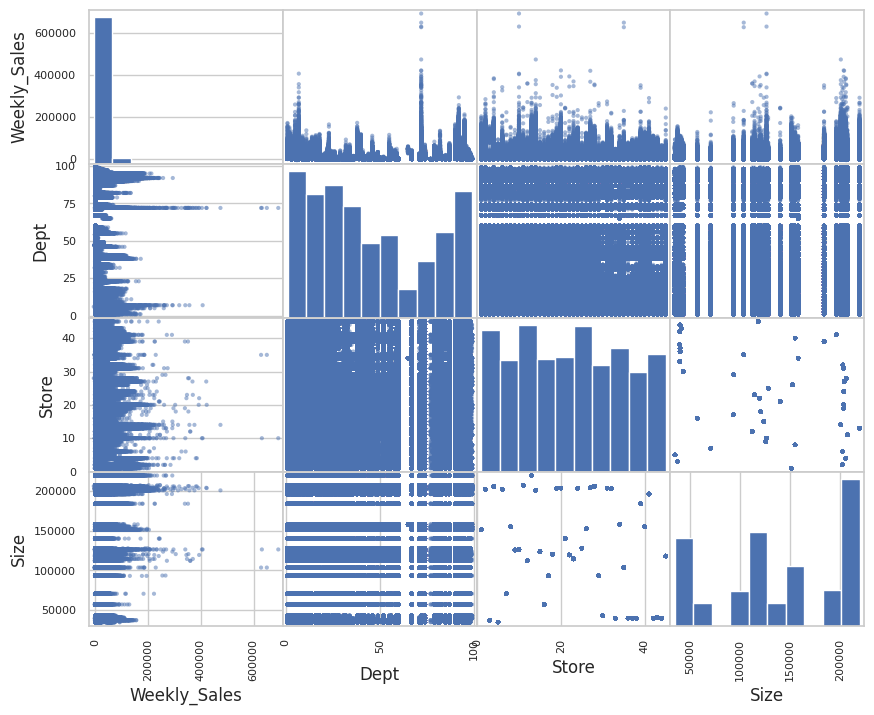

In [ ]:
from pandas.plotting import scatter_matrix
row =["Weekly_Sales","Dept","Store","Size","year"]
scatter_matrix(df[row],figsize=(10,8))

In [ ]:
year_week_dept = df.groupby(['Dept','year'])["Weekly_Sales"].sum()

In [ ]:
year_week_dept



Dept  year
1     2010    4.284353e+07
      2011    4.534931e+07
      2012    3.544593e+07
2     2010    9.405293e+07
      2011    1.015053e+08
                  ...     
98    2011    1.459991e+07
      2012    1.150465e+07
99    2010    1.568000e+02
      2011    2.631143e+05
      2012    9.487876e+04
Name: Weekly_Sales, Length: 243, dtype: float64

In [ ]:
year_sale = year_week_dept.unstack()

In [ ]:
year_sale

year,2010,2011,2012
Dept,,,
1,4.284353e+07,4.534931e+07,3.544593e+07
2,9.405293e+07,1.015053e+08,8.505299e+07
3,2.509114e+07,2.701822e+07,2.378310e+07
4,5.557729e+07,6.056611e+07,5.100335e+07
5,5.177156e+07,5.036340e+07,3.347240e+07
...,...,...,...
95,1.498584e+08,1.615699e+08,1.378918e+08
96,2.350948e+07,2.675970e+07,2.356474e+07
97,2.948267e+07,3.261287e+07,2.740097e+07


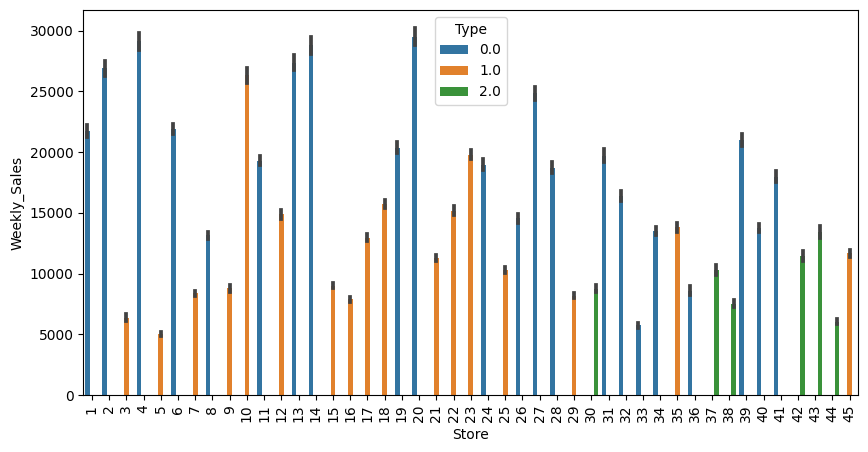

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Store', y='Weekly_Sales', hue='Type')
plt.tick_params(axis='x', labelrotation=90 )

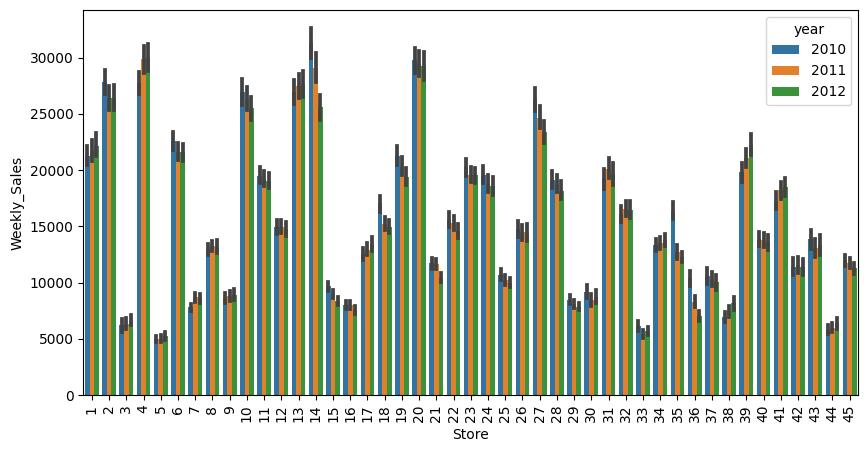

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Store', y='Weekly_Sales', hue='year')
plt.tick_params(axis='x', labelrotation=90 )